In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kyphosis-dataset/kyphosis.csv


In [2]:
df = pd.read_csv('/kaggle/input/kyphosis-dataset/kyphosis.csv')
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


**Kyphosis is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back.**  
![image](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwjC08Tu35jlAhVPPBoKHfkmB9oQjRx6BAgBEAQ&url=https%3A%2F%2Fwww.spineuniverse.com%2Fconditions%2Fkyphosis&psig=AOvVaw1JtpA-bMtuO2bYofq89qvG&ust=1571039238574185)  
**The data represnts a number of patients who had kyphosis.They later had a corective spinal surgery.The dataframe now represents if kyphosis was presnt or absent after the operation**
* Age is in months( since the patients are kids) 
* Number is number of vertabrae involved in the operation
* Start is the number of the first (top most) vertabrae operated on

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Exploratory Data Analysis  
*since the dataset is small  we use a pair plot*

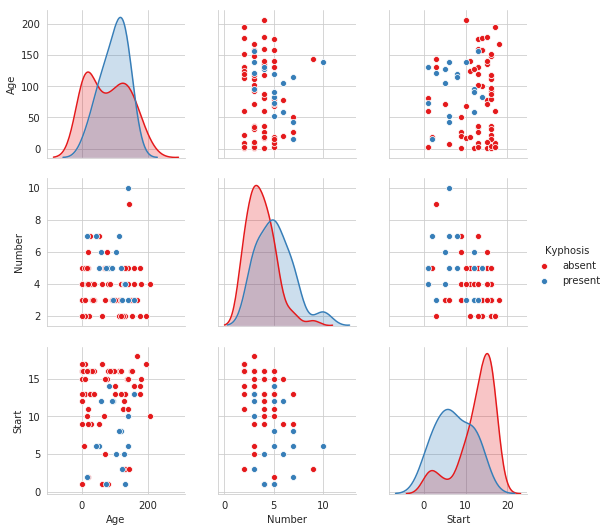

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1');

### Train Test Split

In [5]:
from  sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Kyphosis', axis=1),df['Kyphosis'],test_size=0.30)

### Decision Trees  
**We'll start just by training a single decision tree.**

In [7]:
from  sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction and Evaluation 
***Let's evaluate our decision tree.***

In [10]:
prediction = dtree.predict(X_test)

In [11]:
from  sklearn.metrics import confusion_matrix, classification_report

In [12]:
confusion_matrix(y_test, prediction)

array([[14,  7],
       [ 2,  2]])

In [13]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.88      0.67      0.76        21
     present       0.22      0.50      0.31         4

    accuracy                           0.64        25
   macro avg       0.55      0.58      0.53        25
weighted avg       0.77      0.64      0.68        25



* **Type I Error(*False positive*)  is 2 i.e model predicted 2 kids out  of 25 kids have kyphosis and they actually  don't have it**
* **Type II  Error(*False negative*) is 3 i.e model predicted  3 kids out  of 25 don't have kyphosis and they actuall  have it **  
*This is not very bad .  
Now let's compare the decision tree model to a random forest.*  
### Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rfc_pred = rfc.predict(X_test)

In [16]:
confusion_matrix(y_test,rfc_pred)

array([[20,  1],
       [ 3,  1]])

In [17]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

### Conclusion  
* **Type I Error has a reduced to one kid predicted to have kyphosis and actually  he/she does not have it**
* **Type II Error increased to 4 kids being misdiagonised that they dont have kyphosis and actually they do have it.**  
*Random forest dint perfome well  as expected as we can say its because the dataset was small(81) and unbalanced as we had about 3 times absent than present and hence a higher type I error*